In this section the Fourth Order Runge Kutta method is derived and applied to the Lorenz system to create an approximation of the function. This approximation is visualized using matplot.lib

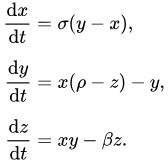

In [ ]:
!pip install nolds

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import nolds
from sklearn import preprocessing
from mpl_toolkits import mplot3d
from scipy.interpolate import splprep, splev



In [ ]:
'''

Set of several chaos metrics to characterize the visualized chaotic system

'''


def chaos_metrics(data):
  h = nolds.hurst_rs(data)
  rl = nolds.lyap_r(data)
  el = nolds.lyap_e(data)
  fd = nolds.corr_dim(data, 1)
  entropy = nolds.sampen(data)

  print("Hurst from nolds custom library", h)
  print("Rosenstein Lyapunov estimation from nolds custom library", rl)
  print("Eckmann Lyapunov estimation from nolds custom library", el)
  print("Fractal Dimension from nolds library", fd)
  print("Entropy from nolds library", entropy)

In [ ]:
'''

Functions for Lorenz system

Inputs : A set of values and hyperparameters
Outputs : The derivatives of the system defined by the lorenz function

'''
def Lorenz_System(x, y, z, dt, sig, p, b):

  dx = (sig*(y-x)) * dt
  dy = (x*(p - z)-y) * dt
  dz = (x*y - b*z) * dt


  return [x+dx, y+dy, z+dz]


def generate_points(function, initial_conditions=[.01, 0, 0],h=.01,N=1000,hyper_parameters=[10, 28, 8/3]):

  t_values = list(range(0, int(N), 1))
  t_values_scaled =  [h*x for x in t_values]
  values = []


  for t in t_values_scaled:
    if t == t_values_scaled[0]:
      point = function(initial_conditions[0], initial_conditions[1], initial_conditions[2], h, 10, 28, 8/3)
      new_point = point
      values.append(new_point)
    else:
      new_point = function(new_point[0], new_point[1], new_point[2], h, 10, 28, 8/3)
      values.append(new_point)
  return values

In [ ]:
'''

Functions for Roessler system

Inputs : A set of values and hyperparameters
Outputs : The derivatives of the system defined by the roessler function


'''

def Roessler_System(x, y, z, dt, a, b, c):
  x+=-(y+z)*dt
  y+= (x+a*y)*dt
  z+= (b+(x-c)*z)*dt
  return [x, y, z]

In [ ]:
N = 5000.0
h = .01

t_values = list(range(0, int(N), 1))
t_values_scaled =  [h*x for x in t_values]
initial_conditions = [.01, 0, 0]
values = []


for t in t_values_scaled:
  if t == t_values_scaled[0]:
    point = Lorenz_System(initial_conditions[0], initial_conditions[1], initial_conditions[2], h, 10, 28, 8/3)
    new_point = point
    values.append(new_point)
  else:
    new_point = Lorenz_System(new_point[0], new_point[1], new_point[2], h, 10, 28, 8/3)
    values.append(new_point)





In [ ]:
values

[[0.009000000000000001, 0.0028000000000000004, 0.0],
 [0.00838, 0.005292000000000001, 2.520000000000001e-07],
 [0.0080712, 0.007585479978882401, 6.887496000000001e-07],
 [0.00802262799788824, 0.00976956112350322, 1.2826222040555566e-06],
 [0.008197321310449738, 0.011918201248776886, 2.032194491245716e-06],
 [0.008569409304282452, 0.014094269036629532, 2.954975888934105e-06],
 [0.00912189527751716, 0.016352760698238343, 4.083972134091394e-06],
 [0.009844981819589278, 0.018743363396425104, 5.46674791639191e-06],
 [0.01073481997727286, 0.02131252413374551, 7.166248690712395e-06],
 [0.011792590392920124, 0.02410514771676056, 9.263009823997143e-06],
 [0.013023846125304168, 0.027166020457261783, 1.1858617562536463e-05],
 [0.01443806355849993, 0.03054103562332623, 1.5080448463591249e-05],
 [0.01604836076498256, 0.03427828088614821, 1.9087837305948763e-05],
 [0.017871352777099125, 0.038429036028196854, 2.407993049176659e-05],
 [0.019927121102208897, 0.043048720142093315, 3.0305587609423727e-05

In [ ]:
'''

Break down values list into x-z, x-y, y-z values

'''
x_values = []
y_values = []
z_values = []

for i in range(5, len(values)):
  x_values.append(values[i][0])
  y_values.append(values[i][1])
  z_values.append(values[i][2])



In [ ]:
'''

Output of several chaos metrics applied to the x,y,z values of the Lorenz System

'''

# Chaotic Metrics
print('x_values chaos')
chaos_metrics(x_values)
print('y_values chaos')
chaos_metrics(y_values)
print('z_values chaos')
chaos_metrics(z_values)

x_values chaos


/usr/local/lib/python3.10/dist-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1248
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


Hurst from nolds custom library 0.8204877187597354
Rosenstein Lyapunov estimation from nolds custom library 0.014674191291515568
Eckmann Lyapunov estimation from nolds custom library [ 0.04030645  0.01714732 -0.07279677 -0.13642281]
Fractal Dimension from nolds library 0.9427165913255178
Entropy from nolds library 0.1502364923783214
y_values chaos


/usr/local/lib/python3.10/dist-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1248
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


Hurst from nolds custom library 0.8181782538845651
Rosenstein Lyapunov estimation from nolds custom library 0.009797988181303476
Eckmann Lyapunov estimation from nolds custom library [ 0.04584085  0.02053424 -0.0717064  -0.1483648 ]
Fractal Dimension from nolds library 0.9348896179286947
Entropy from nolds library 0.15270608760698653
z_values chaos


/usr/local/lib/python3.10/dist-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1248
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 274
  warnings.warn(msg.format(lag), RuntimeWarning)


Hurst from nolds custom library 0.7450040188783442
Rosenstein Lyapunov estimation from nolds custom library 0.036758209560431666
Eckmann Lyapunov estimation from nolds custom library [ 0.07826259  0.03279091 -0.04036668 -0.14173912]
Fractal Dimension from nolds library 0.9637460473974468
Entropy from nolds library 0.2492881604735689


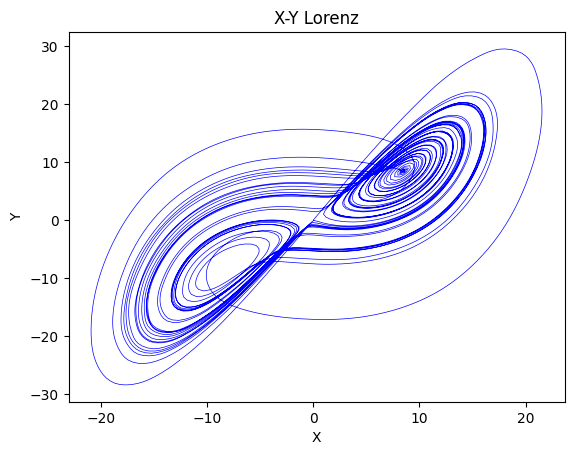

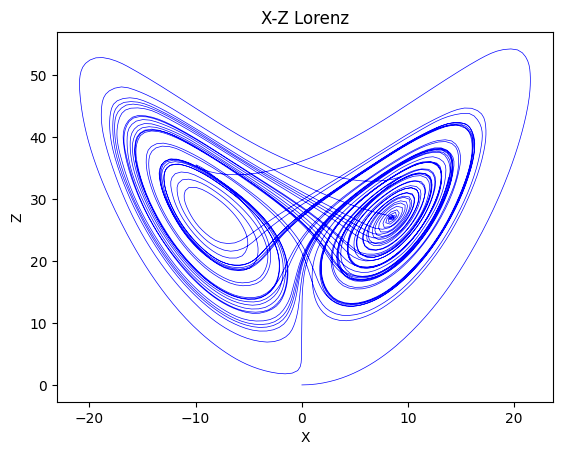

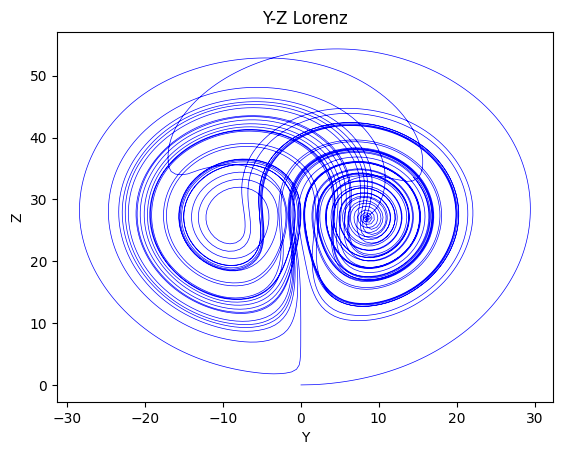

In [ ]:
'''

The following plots the Lorenz System in the X-Y, X-Z, Y-Z plane respectively

'''


# X-Y Plot
tck, u = splprep([x_values, y_values], s=1)
u_new = np.linspace(0, 1, len(t_values))
x_new, y_new = splev(u_new, tck)
plt.plot(x_new, y_new, 'b-', label='X-Y Plot',  linewidth=0.5)
plt.title('X-Y Lorenz')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#X-Z Plot
tck, u = splprep([x_values, z_values], s=1)
u_new = np.linspace(0, 1, len(t_values))
x_new, z_new = splev(u_new, tck)
plt.plot(x_new, z_new, 'b-', label='X-Z Plot',  linewidth=0.5)
plt.title('X-Z Lorenz')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

#Y-Z Plot
tck, u = splprep([y_values, z_values], s=1)
u_new = np.linspace(0, 1, len(t_values))
y_new, z_new = splev(u_new, tck)
plt.plot(y_new, z_new, 'b-', label='y-Z Plot', linewidth=0.5)
plt.title('Y-Z Lorenz')
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()


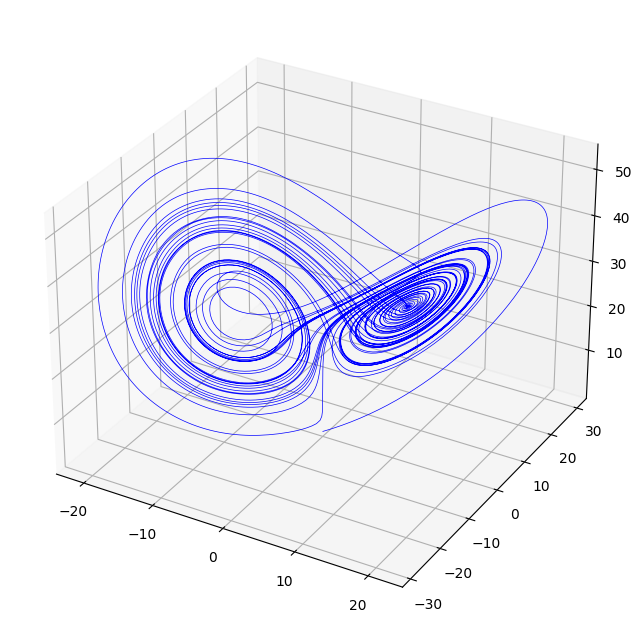

In [ ]:
'''

3D Plot of the Lorenz System

'''

tck, u = splprep([x_values, y_values, z_values], s=1)
u_new = np.linspace(0, 1, len(t_values))

x_new, y_new, z_new = splev(u_new, tck)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_new, y_new, z_new, 'b-', label='Smooth Curve',  linewidth=0.5)